
# Titanic Dataset Analysis

* * *

*Logistic Regression*

* * *

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd

### Data Acquisition of the Titanic dataset


In [2]:
Titanic_Train_data= pd.read_csv('E:\\Melita\\Python\\Assignment_02\\Data Set\\train.csv')

In [3]:
Titanic_Train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
Titanic_Train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
Titanic_Train_data.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [6]:
Titanic_Train_data.shape

(891, 12)

In [7]:
Titanic_Test_data= pd.read_csv('E:\\Melita\\Python\\Assignment_02\\Data Set\\test.csv')

In [8]:
Titanic_Test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
Titanic_Test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
Titanic_Test_data.columns

Index([u'PassengerId', u'Pclass', u'Name', u'Sex', u'Age', u'SibSp', u'Parch',
       u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [11]:
Titanic_Test_data.shape

(418, 11)

### Perform Exploratory Data Analysis (EDA) for the train dataset

In [12]:
#importing required libraries for visualization
import matplotlib.pyplot as plt
%matplotlib inline

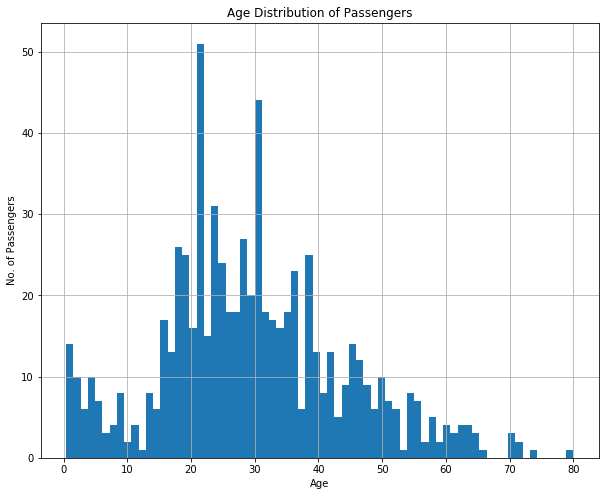

In [13]:
#passenger age distribution
plt.figure(figsize=(10,8))
Titanic_Train_data['Age'].hist(bins= 70)
plt.xlabel('Age')
plt.ylabel('No. of Passengers')
plt.title('Age Distribution of Passengers')
plt.show()

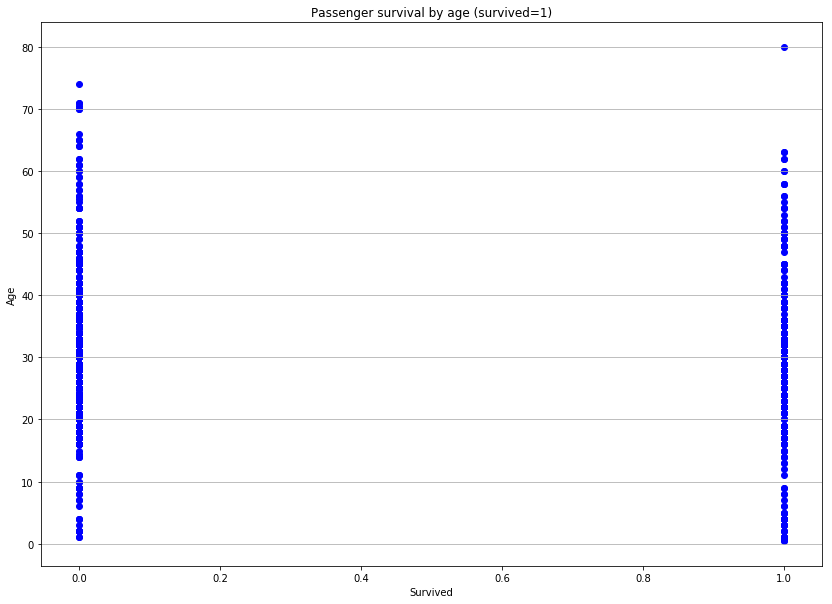

In [14]:
#passenger survival by age
plt.figure(figsize=(14,10))
plt.scatter(Titanic_Train_data[u'Survived'],Titanic_Train_data[u'Age'],color='b')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.title('Passenger survival by age (survived=1)')
#format grid linestyle of graph
plt.grid(b=True,which='major',axis='y')
plt.show()

In [15]:
#passenger age distribution
Titanic_Train_data[u'Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [16]:
#passenger survival by age
Titanic_Train_data[u'Age'].groupby(Titanic_Train_data[u'Survived']).describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


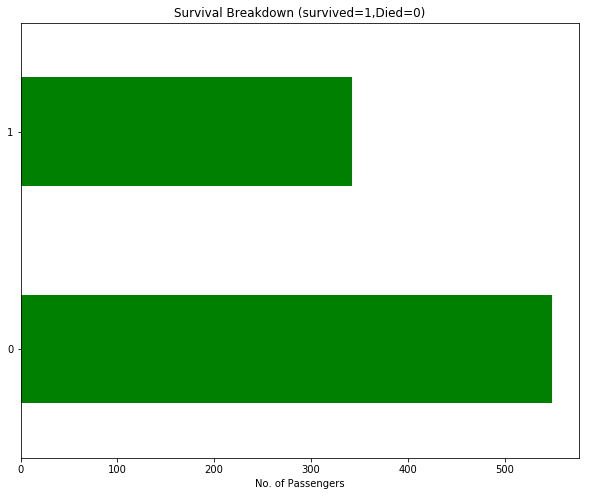

In [17]:
#passenger survival breakdown
plt.figure(figsize=(10,8))
Titanic_Train_data[u'Survived'].value_counts().plot(kind='barh', color='g')
plt.title('Survival Breakdown (survived=1,Died=0)')
plt.xlabel('No. of Passengers')
plt.show()

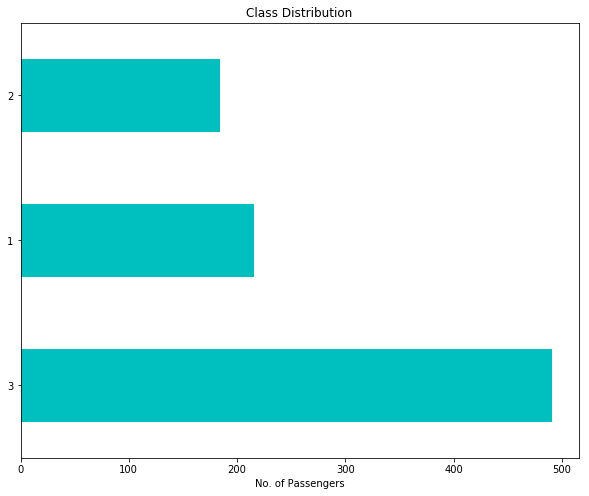

In [18]:
#passengers class distribution
plt.figure(figsize=(10,8))
Titanic_Train_data[u'Pclass'].value_counts().plot(kind='barh',color='c')
plt.title('Class Distribution')
plt.xlabel('No. of Passengers')
plt.show()

In [19]:
#passengers class distribution
Titanic_Train_data.groupby(Titanic_Train_data[u'Pclass']).describe()

Age                                                       Fare  \
        count       mean        std   min   25%   50%   75%   max  count   
Pclass                                                                     
1       186.0  38.233441  14.802856  0.92  27.0  37.0  49.0  80.0  216.0   
2       173.0  29.877630  14.001077  0.67  23.0  29.0  36.0  70.0  184.0   
3       355.0  25.140620  12.495398  0.42  18.0  24.0  32.0  74.0  491.0   

                  ...  SibSp      Survived                                     \
             mean ...    75%  max    count      mean       std  min  25%  50%   
Pclass            ...                                                           
1       84.154687 ...    1.0  3.0    216.0  0.629630  0.484026  0.0  0.0  1.0   
2       20.662183 ...    1.0  3.0    184.0  0.472826  0.500623  0.0  0.0  0.0   
3       13.675550 ...    1.0  8.0    491.0  0.242363  0.428949  0.0  0.0  0.0   

                  
        75%  max  
Pclass            
1       1.0  1.0  
2       1.0  1.0  
3       0.0  1.0  

[3 rows x 48 columns]

In [20]:
#passengers embarkations by location
Titanic_Train_data.groupby(Titanic_Train_data[u'Embarked']).describe()

Age                                                        Fare  \
          count       mean        std   min    25%   50%   75%   max  count   
Embarked                                                                      
C         130.0  30.814769  15.434860  0.42  21.25  29.0  40.0  71.0  168.0   
Q          28.0  28.089286  16.915396  2.00  17.50  27.0  34.5  70.5   77.0   
S         554.0  29.445397  14.143192  0.67  21.00  28.0  38.0  80.0  644.0   

                    ...  SibSp      Survived                                \
               mean ...    75%  max    count      mean       std  min  25%   
Embarked            ...                                                      
C         59.954144 ...    1.0  2.0    168.0  0.553571  0.498608  0.0  0.0   
Q         13.276030 ...    0.0  4.0     77.0  0.389610  0.490860  0.0  0.0   
S         27.079812 ...    1.0  8.0    644.0  0.336957  0.473037  0.0  0.0   

                         
          50%  75%  max  
Embarked                 
C         1.0  1.0  1.0  
Q         0.0  1.0  1.0  
S         0.0  1.0  1.0  

[3 rows x 56 columns]

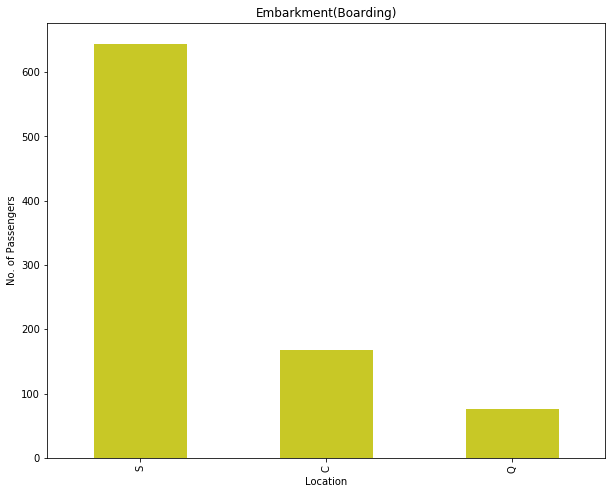

In [21]:
#passengers embarkations by location
plt.figure(figsize=(10,8))
Titanic_Train_data[u'Embarked'].value_counts().plot(kind='bar',color='y', alpha=.85)
plt.title('Embarkment(Boarding)')
plt.xlabel('Location')
plt.ylabel('No. of Passengers')
plt.show()

### Perform machine learning to train the machine model

In [22]:
x_features=Titanic_Train_data[[u'PassengerId',u'Pclass', u'Sex', u'Age',u'SibSp', u'Parch']]
def sex(gender):
    if gender=='male':
        return 0
    elif gender=='female':
        return 1
x_features[u'Sex']=x_features[u'Sex'].apply(sex)
x_features['Age']=x_features['Age'].fillna(x_features['Age'].mean())

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
x_features.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,0.352413,29.699118,0.523008,0.381594
std,257.353842,0.836071,0.477990,13.002015,1.102743,0.806057
min,1.000000,1.000000,0.000000,0.420000,0.000000,0.000000
25%,223.500000,2.000000,0.000000,22.000000,0.000000,0.000000
50%,446.000000,3.000000,0.000000,29.699118,0.000000,0.000000
75%,668.500000,3.000000,1.000000,35.000000,1.000000,0.000000
max,891.000000,3.000000,1.000000,80.000000,8.000000,6.000000


In [24]:
y_target=Titanic_Train_data['Survived']

In [25]:
print x_features.shape, y_target.shape

(891, 6) (891L,)


### Machine Learning: Model Training

In [26]:
x_features.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,1,3,0,22.0,1,0
1,2,1,1,38.0,1,0
2,3,3,1,26.0,0,0
3,4,1,1,35.0,1,0
4,5,3,0,35.0,0,0


In [27]:
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression()

In [28]:
logreg.fit (x_features,y_target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
test_data=Titanic_Test_data[[u'PassengerId',u'Pclass', u'Sex', u'Age',u'SibSp', u'Parch']]
test_data[u'Sex']=test_data[u'Sex'].apply(lambda Sex:1 if Sex=='male' else 0)
test_data['Age']=test_data['Age'].fillna(test_data['Age'].mean())

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
test_data.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.636364,30.272590,0.447368,0.392344
std,120.810458,0.841838,0.481622,12.634534,0.896760,0.981429
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,23.000000,0.000000,0.000000
50%,1100.500000,3.000000,1.000000,30.272590,0.000000,0.000000
75%,1204.750000,3.000000,1.000000,35.750000,1.000000,0.000000
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000


In [31]:
survived=logreg.predict(test_data)
survived

array([1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1,

In [32]:
Titanic_predicted_data=test_data.copy()
Titanic_predicted_data['survived']= survived

In [33]:
Titanic_predicted_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,survived
0,892,3,1,34.5,0,0,1
1,893,3,0,47.0,1,0,0
2,894,2,1,62.0,0,0,1
3,895,3,1,27.0,0,0,1
4,896,3,0,22.0,1,1,0


### Machine Learning: Model Persistence

In [34]:
#import library for model persistence
import pickle as pkl

In [35]:
#use dumps method to persist the model
persist_model = pkl.dumps(logreg)
persist_model

"ccopy_reg\n_reconstructor\np0\n(csklearn.linear_model.logistic\nLogisticRegression\np1\nc__builtin__\nobject\np2\nNtp3\nRp4\n(dp5\nS'warm_start'\np6\nI00\nsS'C'\np7\nF1.0\nsS'n_jobs'\np8\nI1\nsS'verbose'\np9\nI0\nsS'fit_intercept'\np10\nI01\nsS'solver'\np11\nS'liblinear'\np12\nsS'classes_'\np13\ncnumpy.core.multiarray\n_reconstruct\np14\n(cnumpy\nndarray\np15\n(I0\ntp16\nS'b'\np17\ntp18\nRp19\n(I1\n(L2L\ntp20\ncnumpy\ndtype\np21\n(S'i8'\np22\nI0\nI1\ntp23\nRp24\n(I3\nS'<'\np25\nNNNI-1\nI-1\nI0\ntp26\nbI00\nS'\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x01\\x00\\x00\\x00\\x00\\x00\\x00\\x00'\np27\ntp28\nbsS'n_iter_'\np29\ng14\n(g15\n(I0\ntp30\ng17\ntp31\nRp32\n(I1\n(L1L\ntp33\ng21\n(S'i4'\np34\nI0\nI1\ntp35\nRp36\n(I3\nS'<'\np37\nNNNI-1\nI-1\nI0\ntp38\nbI00\nS'\\x0f\\x00\\x00\\x00'\np39\ntp40\nbsS'intercept_scaling'\np41\nI1\nsS'penalty'\np42\nS'l2'\np43\nsS'multi_class'\np44\nS'ovr'\np45\nsS'random_state'\np46\nNsS'_sklearn_version'\np47\nS'0.19.1'\np48\nsS'dual'\np49\nI00\nsS'tol'\np50

In [36]:
#use joblib.dump to persist the model to a file
#create new estimator for the saved model
from sklearn.externals import joblib
joblib.dump(logreg,'logregmodel.pkl')

['logregmodel.pkl']

In [37]:
#view the estimator
new_logreg_estimator= joblib.load('logregmodel.pkl')
new_logreg_estimator

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
#validate as use new estimator for prediction
new_logreg_estimator.predict(test_data)

array([1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1,